# Json To Network

## 01 Data Load

In [190]:
import networkx as nx
import json
import matplotlib.pyplot as plt
# from networkx.algorithms import community
import community # python-louvain
import seaborn as sns
import matplotlib.cm as cm

In [191]:
with open('./Data_ver20211217.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [192]:
data.keys()

dict_keys(['Node_paper', 'Node_text', 'Node_person', 'Node_journal', 'Node_volume', 'Node_book', 'Node_publisher', 'Node_group', 'Node_term', 'Link_person2paper', 'Link_paper2volume', 'Link_volume2journal', 'Link_group2journal', 'Link_publisher2book', 'Link_text2paper', 'Link_book2text', 'Link_paper2text', 'Link_term2text', 'Link_person2text'])

In [193]:
# Node
data['Node_text']

[{'id': 'T01SP001', 'class_field': 'Text', 'name': '1.서론'},
 {'id': 'T02SP001', 'class_field': 'Text', 'name': "2.문학사의 전회와 '문화론적 연구'"},
 {'id': 'T03SP001', 'class_field': 'Text', 'name': '3.근대 문학주의와 문화적 현실에 대한 성찰'},
 {'id': 'T04SP001',
  'class_field': 'Text',
  'name': "4.문화사로서의 '문화론적 연구'와 문화연구로서의 '문화론적 연구'"},
 {'id': 'T05SP001', 'class_field': 'Text', 'name': '5.결론에 대신하여'},
 {'id': 'T01SP003', 'class_field': 'Text', 'name': '1.서론'},
 {'id': 'T02SP003', 'class_field': 'Text', 'name': '2.지적 격차의 문화(사)와 민중의 글쓰기'},
 {'id': 'T03SP003', 'class_field': 'Text', 'name': '3.돼지와 별: 서발턴은 쓰지 못한다'},
 {'id': 'T04SP003',
  'class_field': 'Text',
  'name': '4.결론을 대신하여: 김진숙의 길, 신경숙의 길'},
 {'id': 'T01SP004', 'class_field': 'Text', 'name': '1.들어가며'},
 {'id': 'T02SP004', 'class_field': 'Text', 'name': '2.1980년대의 시대인식에 대해'},
 {'id': 'T03SP004', 'class_field': 'Text', 'name': '3.1980년대 문학론 재독'},
 {'id': 'T04SP004', 'class_field': 'Text', 'name': '4.맺음말'},
 {'id': 'T01SP012', 'class_field': 'Text', 'name': '

In [194]:
# Edge
data['Link_book2text']

[{'sourceid': 'B002',
  'targetid': 'T02SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B003',
  'targetid': 'T01SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B004',
  'targetid': 'T01SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B005',
  'targetid': 'T03SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B006',
  'targetid': 'T01SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B007',
  'targetid': 'T03SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B008',
  'targetid': 'T02SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'}]

## 02 Network

In [195]:
# 네트워크 초기화
G= nx.DiGraph()
# G = nx.Graph()

#### Node 추가

In [196]:
# Json에서 Node만 가져오기
Nodes = {k:v for k, v in data.items() if k.startswith('Node')}

In [197]:
Nodes.keys()

dict_keys(['Node_paper', 'Node_text', 'Node_person', 'Node_journal', 'Node_volume', 'Node_book', 'Node_publisher', 'Node_group', 'Node_term'])

In [198]:
# id(node 고유이름)
Nodes['Node_paper'][0]['id']

'SP001'

In [199]:
# attribute(id 제외한 속성)
{k:v for k,v in Nodes['Node_paper'][0].items() if k!='id'}

{'class_field': 'Paper',
 'name': "'문화론적 연구'의 현실 인식과 전망",
 'url': 'http://www.klbksk.com/wiki/index.php/HDAA0001'}

In [200]:
# add_nodes_from 함수에 node와 attribute 투입
for node_key in Nodes:
    print(node_key)
    G.add_nodes_from([(N['id'],{k:v for k,v in N.items() if k!='id'}) for N in Nodes[node_key]])

Node_paper
Node_text
Node_person
Node_journal
Node_volume
Node_book
Node_publisher
Node_group
Node_term


In [201]:
# 추가된 node 확인
G.nodes

NodeView(('SP001', 'SP003', 'SP004', 'SP012', 'SP014', 'SP101', 'SP102', 'SP103', 'SP104', 'SP105', 'SP106', 'SP107', 'SP108', 'SP109', 'SP110', 'SP111', 'T01SP001', 'T02SP001', 'T03SP001', 'T04SP001', 'T05SP001', 'T01SP003', 'T02SP003', 'T03SP003', 'T04SP003', 'T01SP004', 'T02SP004', 'T03SP004', 'T04SP004', 'T01SP012', 'T02SP012', 'T03SP012', 'T04SP012', 'T01SP014', 'T02SP014', 'T03SP014', 'T04SP014', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019', 'P020', 'P021', 'P022', 'P023', 'J001', 'J002', 'J003', 'J004', 'J005', 'J006', 'J007', 'J008', 'J009', 'J010', 'J011', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012', 'B001', 'B002', 'B003', 'B004', 'B005', 'B006', 'B007', 'B008', 'PB001', 'PB002', 'PB003', 'PB004', 'PB005', 'PB006', 'PB007', 'G001', 'G002', 'G003', 'G004', 'G005', 'G006', 'G007', 'TM001', 'TM002', 'TM003', 'TM004'))

#### Edge 추가

In [202]:
# Json에서 Edge만 가져오기
Edges = {k:v for k, v in data.items() if k.startswith('Link')}
Edges

{'Link_person2paper': [{'sourceid': 'P001',
   'targetid': 'SP001',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P001',
   'targetid': 'SP003',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P001',
   'targetid': 'SP004',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P021',
   'targetid': 'SP012',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P022',
   'targetid': 'SP014',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P002',
   'targetid': 'SP101',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P003',
   'targetid': 'SP102',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P004',
   'targetid': 'SP103',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P006',
   'targetid': 'SP104',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P007',
   'targetid': 'SP105',
   'relationEn

In [203]:
Edges.keys()

dict_keys(['Link_person2paper', 'Link_paper2volume', 'Link_volume2journal', 'Link_group2journal', 'Link_publisher2book', 'Link_text2paper', 'Link_book2text', 'Link_paper2text', 'Link_term2text', 'Link_person2text'])

In [204]:
# add_edges_from 함수에 source, target과 attribute 투입
for edge_key in Edges:
    print(edge_key)
    G.add_edges_from([(E['sourceid'],E['targetid'],{k:v for k,v in E.items() if 'id' not in k}) for E in Edges[edge_key]])

Link_person2paper
Link_paper2volume
Link_volume2journal
Link_group2journal
Link_publisher2book
Link_text2paper
Link_book2text
Link_paper2text
Link_term2text
Link_person2text


In [205]:
# 추가된 edge 확인
G.edges

OutEdgeView([('SP001', 'V001'), ('SP012', 'V012'), ('SP012', 'T03SP014'), ('SP101', 'V002'), ('SP101', 'T02SP001'), ('SP102', 'V003'), ('SP102', 'T01SP001'), ('SP103', 'V004'), ('SP103', 'T02SP001'), ('SP104', 'V005'), ('SP104', 'T02SP001'), ('SP105', 'V006'), ('SP105', 'T03SP001'), ('SP106', 'V003'), ('SP106', 'T01SP001'), ('SP107', 'V007'), ('SP107', 'T02SP001'), ('SP108', 'V008'), ('SP108', 'T03SP001'), ('SP109', 'V009'), ('SP109', 'T03SP001'), ('SP110', 'V010'), ('SP110', 'T02SP001'), ('SP111', 'T01SP003'), ('T01SP001', 'SP001'), ('T02SP001', 'SP001'), ('T03SP001', 'SP001'), ('T04SP001', 'SP001'), ('T05SP001', 'SP001'), ('T01SP003', 'SP003'), ('T02SP003', 'SP003'), ('T03SP003', 'SP003'), ('T04SP003', 'SP003'), ('T01SP004', 'SP004'), ('T02SP004', 'SP004'), ('T03SP004', 'SP004'), ('T04SP004', 'SP004'), ('T01SP012', 'SP012'), ('T02SP012', 'SP012'), ('T03SP012', 'SP012'), ('T04SP012', 'SP012'), ('T01SP014', 'SP014'), ('T02SP014', 'SP014'), ('T03SP014', 'SP014'), ('T04SP014', 'SP014'), 

## 03 Community Detection
Louvain Community Detection : https://github.com/taynaud/python-louvain  
https://github.com/timsainb/graph_research_notes/blob/master/notebooks/1.0-make-networkx-graph.ipynb

In [206]:
# compute the best partition
# partition = community.best_partition(G)
# set(partition.values())

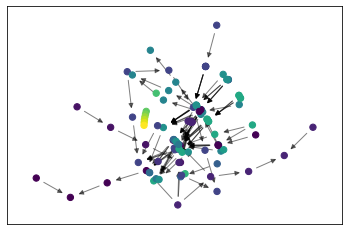

In [207]:
# draw the graph
# pos = nx.spring_layout(G)
pos = nx.drawing.layout.kamada_kawai_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

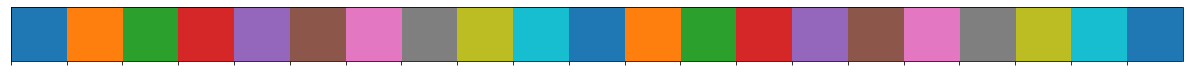

In [208]:
# 커뮤니티
pal = sns.color_palette("tab10", n_colors=len(set(partition.values())))
sns.palplot(pal)

In [209]:
spring_pos = nx.spring_layout(G, k=1/len(G.nodes())**.25)
# kamada_kawai_pos = nx.drawing.layout.kamada_kawai_layout(G)

## 04 Export graph file

In [210]:
G_Json = nx.json_graph.node_link_data(G)
G_Json['edges'] = G_Json.pop('links')

In [211]:
# node에 community(group), x,y, color 추가
# kamada_kawai_layout 활용
class_list = list(set([i['class_field'] for i in G_Json['nodes']]))
for node in G_Json['nodes']:
    node['id'] = node.pop('id')
    node['label'] = node.pop('name')
    node['name'] = node['label']
    node['group'] = partition[node['id']]
    node['x'] = int(spring_pos[node['id']][0] * 256)
    node['y'] = int(spring_pos[node['id']][1] * 256)
    # node['color'] = "rgba("+ ",".join([str(int(i * 255)) for i in pal[partition[node['id']]]])+ ")"
    node['color'] = "rgba("+ ",".join([str(int(i * 255)) for i in pal[class_list.index(node['class_field'])]])+ ")"

In [212]:
label_list = list(set([i['relationKor'] for i in G_Json['edges']]))
for edge in range(len(G_Json['edges'])):
    G_Json['edges'][edge]['id']=edge
    G_Json['edges'][edge]['label'] = G_Json['edges'][edge]['relationKor']
    G_Json['edges'][edge]['color'] = "rgba("+ ",".join([str(int(i * 255)) for i in pal[label_list.index(G_Json['edges'][edge]['relationKor'])]])+ ")"

In [213]:
G_Json

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'class_field': 'Paper',
   'url': 'http://www.klbksk.com/wiki/index.php/HDAA0001',
   'id': 'SP001',
   'label': "'문화론적 연구'의 현실 인식과 전망",
   'name': "'문화론적 연구'의 현실 인식과 전망",
   'group': 0,
   'color': 'rgba(140,86,75)'},
  {'class_field': 'Paper',
   'url': 'http://www.klbksk.com/wiki/index.php/HDAA0003',
   'id': 'SP003',
   'label': "'서발턴은 쓸 수 있는가",
   'name': "'서발턴은 쓸 수 있는가",
   'group': 1,
   'color': 'rgba(140,86,75)'},
  {'class_field': 'Paper',
   'url': 'http://www.klbksk.com/wiki/index.php/HDAA0004',
   'id': 'SP004',
   'label': "'1980년대 문학·문화사 연구를 위한 시론(1)",
   'name': "'1980년대 문학·문화사 연구를 위한 시론(1)",
   'group': 2,
   'color': 'rgba(140,86,75)'},
  {'class_field': 'Paper',
   'url': 'http://www.klbksk.com/wiki/index.php/HDAA0012',
   'id': 'SP012',
   'label': '여성은 번역할 수 있는가',
   'name': '여성은 번역할 수 있는가',
   'group': 4,
   'color': 'rgba(140,86,75)'},
  {'class_field': 'Paper',
   'url': 'http://www.klbksk.com/wi

In [214]:
# json 파일로 네트워크 저장
# json.dump(G_Json,open('graph_data.json','w'))
with open('graph_data.json', 'w') as f:
    json.dump(G_Json,
              f, indent=4)